This notebook runs Ora, GSEA, Enrichr and PET under Benchmark.

In [1]:
import os

import pandas as pd

from PET import *
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_dir = '../data/prerank_DESeq2/'
all_rank_file = os.listdir(data_dir)
all_rank_file.sort()

In [3]:
# run GSEA
gsea_result_dir = '../example_results/GSEA_results/'
for file in all_rank_file:
    target = file.split('.')[0]
    run_GSEA(prerank_file_path=data_dir+file, out_dir=gsea_result_dir, thread_num=10,
         pathway_file='../pathway_files/K562_DESEq2.gmt', no_plot=True,
         min_size=15, max_size=500)
    # rename the GSEA report file
    os.system('mv '+gsea_result_dir+'/gseapy.gene_set.prerank.report.csv '+gsea_result_dir+'/'+target+'.gsea.csv')

2024-05-28 15:34:57,398 [WARNING] Duplicated values found in preranked stats: 73.85% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-05-28 15:34:57,399 [INFO] Parsing data files for GSEA.............................
2024-05-28 15:34:57,418 [INFO] 0000 gene_sets have been filtered out when max_size=500 and min_size=15
2024-05-28 15:34:57,419 [INFO] 0197 gene_sets used for further statistical testing.....
2024-05-28 15:34:57,419 [INFO] Start to run GSEA...Might take a while..................
2024-05-28 15:35:04,772 [INFO] Start to generate gseapy reports, and produce figures...
2024-05-28 15:35:04,773 [INFO] Congratulations. GSEApy runs successfully................

2024-05-28 15:35:04,943 [WARNING] Duplicated values found in preranked stats: 57.37% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-05-28 15:35:04,944 [INFO] Parsing data files for GSEA.............................
2024-05-28 15:3

In [5]:
# read pathway information for Ora and enrichr
pathway_dict = read_gmt('../pathway_files/K562_DESEq2.gmt')

In [6]:
# get top 200 DEGs from rank file
deg_dict = dict()
for file in all_rank_file:
    target = file.split('.')[0]
    deg_dict[target] = extract_deg_rnk(data_dir+file, deg_num=200, ascending=False)

In [7]:
gene_universe = set(pd.read_csv(data_dir+file, sep='\t', header=None)[0])

In [8]:
# run ORA 
ora_result_dir = '../example_results/Ora_results/'
run_ora(pathway_dict=pathway_dict, deg_dict = deg_dict,
        gene_universe_num=len(gene_universe), out_dir=ora_result_dir)


Running ORA for genes in  AARS
Results written to  ../example_results/Ora_results//AARS.ora_result.txt
********************
Running ORA for genes in  AATF
Results written to  ../example_results/Ora_results//AATF.ora_result.txt
********************
Running ORA for genes in  ABCF1
Results written to  ../example_results/Ora_results//ABCF1.ora_result.txt
********************
Running ORA for genes in  ADAR
Results written to  ../example_results/Ora_results//ADAR.ora_result.txt
********************
Running ORA for genes in  AGO1
Results written to  ../example_results/Ora_results//AGO1.ora_result.txt
********************
Running ORA for genes in  AKAP1
Results written to  ../example_results/Ora_results//AKAP1.ora_result.txt
********************
Running ORA for genes in  AKAP8
Results written to  ../example_results/Ora_results//AKAP8.ora_result.txt
********************
Running ORA for genes in  AKAP8L
Results written to  ../example_results/Ora_results//AKAP8L.ora_result.txt
*******************

In [9]:
# Run Enrichr 
enrichr_result_dir = '../example_results/Enrichr_results/'

run_enrichr(pathway_dict=pathway_dict, deg_dict=deg_dict,
            gene_universe=gene_universe, 
            permutation_num=1000, permutation_file_name=enrichr_result_dir+'enrichr_kegg_permutation_1000.txt',
            out_dir=enrichr_result_dir)

Running Enrichr for genes in  AARS
../example_results/Enrichr_results/enrichr_kegg_permutation_1000.txt already exists, reading file now...
Results written to  ../example_results/Enrichr_results//AARS.enrichr_result.txt
********************
Running Enrichr for genes in  AATF
../example_results/Enrichr_results/enrichr_kegg_permutation_1000.txt already exists, reading file now...
Results written to  ../example_results/Enrichr_results//AATF.enrichr_result.txt
********************
Running Enrichr for genes in  ABCF1
../example_results/Enrichr_results/enrichr_kegg_permutation_1000.txt already exists, reading file now...
Results written to  ../example_results/Enrichr_results//ABCF1.enrichr_result.txt
********************
Running Enrichr for genes in  ADAR
../example_results/Enrichr_results/enrichr_kegg_permutation_1000.txt already exists, reading file now...
Results written to  ../example_results/Enrichr_results//ADAR.enrichr_result.txt
********************
Running Enrichr for genes in  AGO1

In [10]:
enrichr_result_dir = '../example_results/Enrichr_results/'
ora_result_dir = '../example_results/Ora_results/'
gsea_result_dir = '../example_results/GSEA_results/'


In [11]:
pet_out_dir = '../example_results/PET_results/'
for file in all_rank_file:
    target = file.split('.')[0]
    run_PET(ora_result_file=ora_result_dir+target+'.ora_result.txt', 
            enrichr_result_file=enrichr_result_dir+target+'.enrichr_result.txt', 
            gsea_result_file=gsea_result_dir+target+'.gsea.csv', 
            pathway_dict = pathway_dict,
            out_dir = pet_out_dir, gsea_pos_label='pos', file_prefix=target)

GSEA path was provided as file, GSEAPY used.
Calculating ora rank...
Calculating enrichr rank...
Calculating GSEA rank...
Ensembling results...
Results written to  ../example_results/PET_results//AARS.PET.txt
GSEA path was provided as file, GSEAPY used.
Calculating ora rank...
Calculating enrichr rank...
Calculating GSEA rank...
Ensembling results...
Results written to  ../example_results/PET_results//AATF.PET.txt
GSEA path was provided as file, GSEAPY used.
Calculating ora rank...
Calculating enrichr rank...
Calculating GSEA rank...
Ensembling results...
Results written to  ../example_results/PET_results//ABCF1.PET.txt
GSEA path was provided as file, GSEAPY used.
Calculating ora rank...
Calculating enrichr rank...
Calculating GSEA rank...
Ensembling results...
Results written to  ../example_results/PET_results//ADAR.PET.txt
GSEA path was provided as file, GSEAPY used.
Calculating ora rank...
Calculating enrichr rank...
Calculating GSEA rank...
Ensembling results...
Results written to 

In [14]:
# summarize results from Ora, enrichr, GSEApy and PET
all_pet_results = os.listdir(pet_out_dir)
all_pet_results.sort()
rank_dict = dict()
methods = ['PET', 'Enrichr', 'GSEA', 'ora']
for m in methods:
    rank_dict[m] = dict()
for file in all_pet_results:
    target = file.split('.')[0]
    df = pd.read_csv(pet_out_dir+file, sep='\t', index_col=0)
    for m in methods:
        rank_dict[m][target] = int(df.loc[target][m+' rank'])

In [17]:
rank_df = pd.DataFrame.from_dict(rank_dict)
for m in methods:
    rank_df[m].to_csv('../example_results/'+m+'_result.txt', sep='\t', header=None)

In [3]:
# plot all results
result_dfs = []
result_dir = '../example_results/'
methods = ['PET', 'Enrichr', 'GSEA', 'ora']
for m in methods:
    res_df = pd.read_csv(result_dir+m+'_result.txt', sep='\t', header=None, index_col=0)
    result_dfs.append(res_df)
# combine the results
all_result_df = pd.concat(result_dfs, axis=1)
all_result_df.columns = methods
all_result_df

,PET,Enrichr,GSEA,ora
0,,,,
AARS,1,1,2,1
AATF,3,4,6,6
ABCF1,10,15,16,15
ADAR,1,1,1,1
AGO1,1,4,1,4
AKAP1,40,50,36,44
AKAP8,6,17,13,12
AKAP8L,1,1,1,1
APOBEC3C,22,18,64,22


In [4]:
def apk(predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average precision at k between two lists of items.
    """
    total_num = len(predicted)
    precision_list = []
    for idx in range(k):
        precision_list.append(np.where(predicted<=idx+1)[0].shape[0]/total_num)
        # print(np.where(predicted<=idx+1)[0].shape[0])
    # return P@10 and AP@10
    return precision_list[-1], np.mean(precision_list)

<Axes: ylabel='Ground truth pathway rank'>

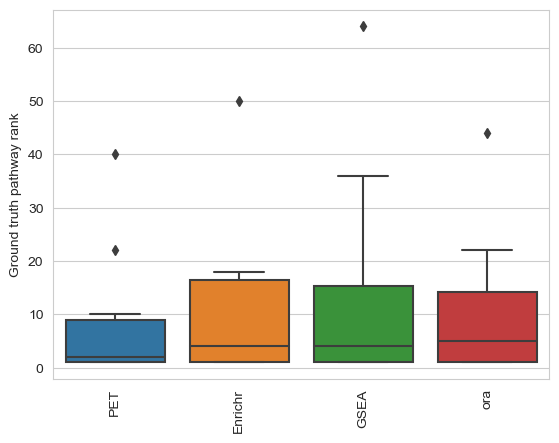

In [5]:
# plot the results
plt.xticks(rotation=90)
plt.ylabel('Ground truth pathway rank')
sns.boxplot(data=all_result_df)

<Axes: ylabel='Proportion'>

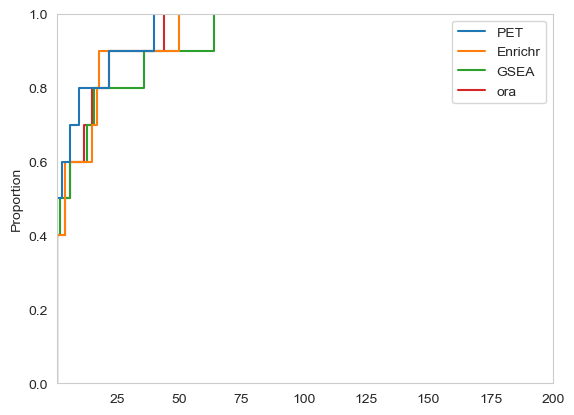

In [7]:
plt.grid(False)
plt.xlim(1, 200)
# plt.ylim(0, 100)
sns.ecdfplot(data=all_result_df, stat='proportion')

In [8]:
for method in all_result_df.columns:
    print('-'*20)
    print(method, 'summary:')
    print('Median rank: ', all_result_df[method].median())
    print('Precision@10: ', apk(all_result_df[method])[0])
    print('Average Precision@10: ', apk(all_result_df[method])[1])

--------------------
PET summary:
Median rank:  2.0
Precision@10:  0.8
Average Precision@10:  0.64
--------------------
Enrichr summary:
Median rank:  4.0
Precision@10:  0.6
Average Precision@10:  0.5399999999999999
--------------------
GSEA summary:
Median rank:  4.0
Precision@10:  0.6
Average Precision@10:  0.5399999999999998
--------------------
ora summary:
Median rank:  5.0
Precision@10:  0.6
Average Precision@10:  0.5199999999999999
